1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)          
2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety             
3.Разделите данные на выборку для обучения и тестирования               
4.Постройте модель LDA             
5.Визуализируйте предсказания для тестовой выборки и центры классов                
6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width                
7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию                

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
data['variety'] = data_class

In [21]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
data1 = data[['sepal length (cm)', 'sepal width (cm)', 'variety']]

In [40]:
data1

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [57]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data_class, test_size=0.25)

In [59]:
len(y_test)

38

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [61]:
lda = LinearDiscriminantAnalysis()

In [62]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [63]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0])

In [64]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [65]:
result

,0,1
0,2,2
1,2,2
2,2,1
3,0,0
4,2,2
5,1,1
6,2,1
7,2,2
8,0,0
9,0,0


In [67]:
# расчет точности - отношение верный прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [69]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.53871624,  7.98680356,  0.        ],
       [ 2.03592573, -3.87476757,  0.        ],
       [ 4.91125964, -4.64847855,  0.        ]])

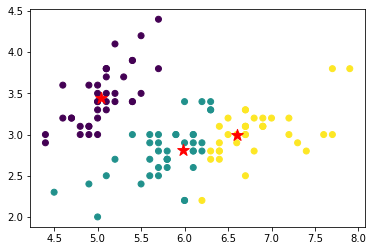

In [73]:
# визуализируем дискриминантную линию только по 2 признакам
# визуализируем центроиды
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=lda.predict(X_train))

plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [75]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width                
7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию   

In [71]:
data2 = data[['sepal length (cm)', 'sepal width (cm)']]

In [72]:
data2

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [82]:
 from sklearn.cluster import KMeans

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data2)

In [93]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

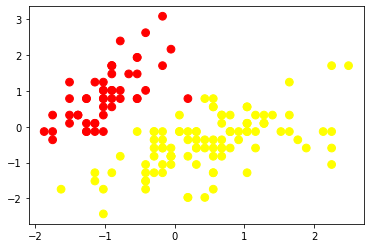

In [94]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)